For comparing the data taken in summer 2019 to the mapping data from fall 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from stl import mesh
from mpl_toolkits import mplot3d
import pandas as pd
import sys, os
from matplotlib import cm

In [3]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"
data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

In [4]:
# print("2019 limits:")
mins_19 = np.min(data_19)
max_19 = np.max(data_19)

# print("2022 limits:")
mins_22 = np.min(data_22)
max_22 = np.max(data_22)

whichMin = mins_19 > mins_22
whichMax = max_19 < max_22

print("mins:", mins_19[whichMin].append(mins_22[~whichMin]))
print("max:", max_19[whichMax].append(max_22[~whichMax]))

mins: x      -90.100000
B_x     -2.439983
B_y     -1.496243
B_z     -3.812240
y     -174.711330
z     -150.751650
dtype: float64
max: B_x      1.602965
x      123.609390
y      -94.612790
z        9.257800
B_y    -28.792258
B_z   -160.995889
dtype: float64


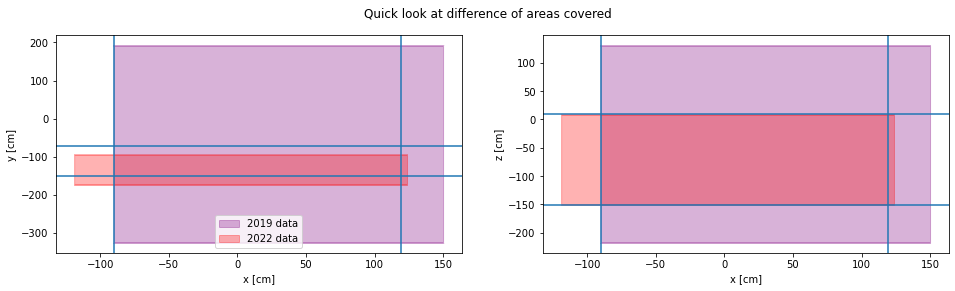

In [5]:
%matplotlib inline

x_cut_min= -90.100
x_cut_max = 119.109
y_cut_min = -152.3023
y_cut_max = -72.2037
z_cut_min = -151.385
z_cut_max = 8.62380

fig, axs = plt.subplots(1, 2, figsize=(16,4))
plt.suptitle("Quick look at difference of areas covered")

minY_19 = np.min(data_19['y'])
maxY_19 = np.max(data_19['y'])
minY_22 = np.min(data_22['y'])
maxY_22 = np.max(data_22['y'])

axs[0].fill_between(data_19['x'], minY_19, maxY_19, color='purple',alpha=.3, label='2019 data')
axs[0].fill_between(data_22['x'], minY_22, maxY_22, color='r',alpha=.3, label='2022 data')

axs[0].axvline(x_cut_min)
axs[0].axvline(x_cut_max)
axs[0].axhline(y_cut_min)
axs[0].axhline(y_cut_max)


axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
axs[0].legend()

minZ_19 = np.min(data_19['z'])
maxZ_19 = np.max(data_19['z'])
minZ_22 = np.min(data_22['z'])
maxZ_22 = np.max(data_22['z'])

axs[1].fill_between(data_19['x'], minZ_19, maxZ_19, color='purple',alpha=.3)
axs[1].fill_between(data_22['x'], minZ_22, maxZ_22, color='r',alpha=.3)

axs[1].axvline(x_cut_min)
axs[1].axvline(x_cut_max)
axs[1].axhline(z_cut_min)
axs[1].axhline(z_cut_max)

axs[1].set_xlabel('x [cm]')
axs[1].set_ylabel('z [cm]')

plt.show()

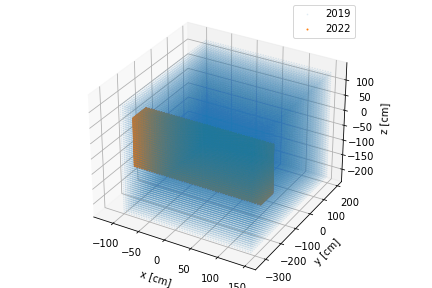

In [7]:
%matplotlib widget
fig = plt.figure() #figsize=(11, 5)
axes = mplot3d.Axes3D(fig)

Q_19 = axes.scatter(data_19['x'], data_19['y'], data_19['z'], s=.5, alpha=.1, label="2019")
Q_22 = axes.scatter(data_22['x'], data_22['y'], data_22['z'], s=1, alpha=1, label="2022" )
axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]')
axes.set_zlabel('z [cm]')
axes.legend()
plt.show()

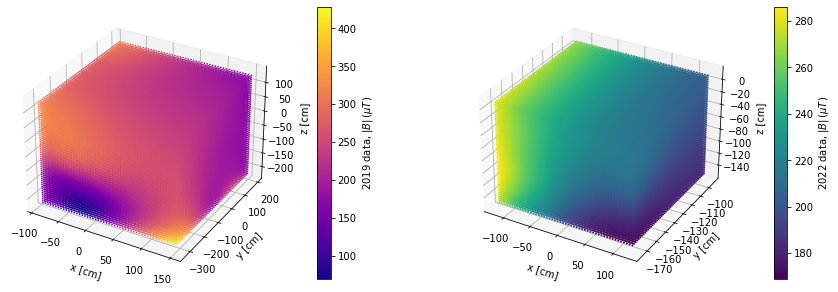

In [15]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

B1_19 = np.sqrt(data_19['B_x']**2 + data_19['B_y']**2 + data_19['B_z']**2 )*100 #muT
Q_19 = ax1.scatter(data_19['x'], data_19['y'], data_19['z'],c=B1_19, s=.5, alpha=1, cmap=cm.plasma)

cbar_19 = fig.colorbar(Q_19, label='2019 data, $|B|\,(\mu T)$', ax=ax1, pad=0.1)

B1_22 = np.sqrt(data_22['B_x']**2 + data_22['B_y']**2 + data_22['B_z']**2 ) #muT
Q_22 = ax2.scatter(data_22['x'], data_22['y'], data_22['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='2022 data, $|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

# Cut files for matching

In [33]:
cut_22 = "data_export/map_referencedMSR_fall2022_together_CUT_interp50.txt"
dataCut_22 = pd.read_csv(cut_22, comment='#', sep='\t', names=colNames)

#the data in this file for the B field is 
cut_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interpCUT50.txt"
dataCut_19 = pd.read_csv(cut_19, comment='#', sep='\t', names=colNames)

print("2019 limits:")
mins_19 = np.min(dataCut_19)
max_19 = np.max(dataCut_19)
print(mins_19, max_19)

print("2022 limits:")
mins_22 = np.min(dataCut_22)
max_22 = np.max(dataCut_22)

print(mins_22, max_22)


2019 limits:
x      -90.100000
y     -151.385000
z     -152.302300
B_x   -102.188385
B_y    -74.644277
B_z   -232.305456
dtype: float64 x      119.109000
y        8.623800
z      -72.203700
B_x    -12.461384
B_y     -8.676683
B_z   -159.377370
dtype: float64
2022 limits:
x      -90.100000
y     -151.385000
z     -152.302300
B_x    -89.929671
B_y    -70.819441
B_z   -251.096038
dtype: float64 x      119.109000
y        8.623800
z      -72.203700
B_x    -11.205665
B_y     -8.546214
B_z   -133.332800
dtype: float64


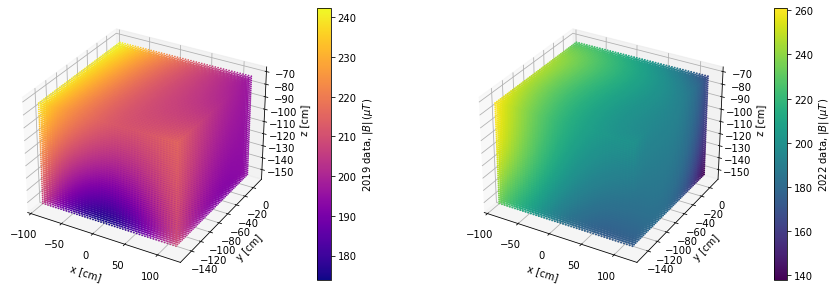

In [34]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

B1_19 = np.sqrt(dataCut_19['B_x']**2 + dataCut_19['B_y']**2 + dataCut_19['B_z']**2 )#muT
Q_19 = ax1.scatter(dataCut_19['x'], dataCut_19['y'], dataCut_19['z'],c=B1_19, s=.5, alpha=1, cmap=cm.plasma)

cbar_19 = fig.colorbar(Q_19, label='2019 data, $|B|\,(\mu T)$', ax=ax1, pad=0.1)

B1_22 = np.sqrt(dataCut_22['B_x']**2 + dataCut_22['B_y']**2 + dataCut_22['B_z']**2 ) #muT
Q_22 = ax2.scatter(dataCut_22['x'], dataCut_22['y'], dataCut_22['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='2022 data, $|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

In [35]:
# list(dataCut_19.columns)

df_compare = dataCut_19.join(dataCut_22, rsuffix='_22', how='outer')
#                               on=list(dataCut_22.columns))

# df_compare.loc[0]['x_19'] = 0
# display(df_compare.columns)
df_compare = df_compare.where((df_compare['x']==df_compare['x_22']) & 
                                      (df_compare['y']==df_compare['y_22']) &
                                      (df_compare['z']==df_compare['z_22']))
df_compare = df_compare.drop(columns=['x_22', 'y_22', 'z_22'])
# display(df_compare)

df_compare['dB_x'] = df_compare['B_x'] - df_compare['B_x_22'] 
df_compare['dB_y'] = df_compare['B_y'] - df_compare['B_y_22'] 
df_compare['dB_z'] = df_compare['B_z'] - df_compare['B_z_22'] 

# display(df_compare)

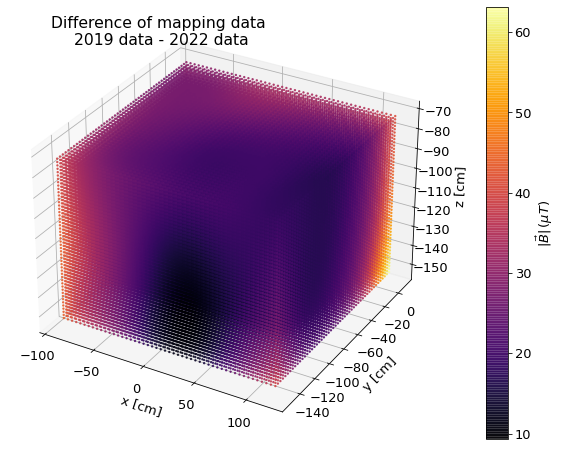

mean 23.38426404013637
std 5.922381422391119


In [36]:
%matplotlib inline

plt.rcParams['font.size'] = '13'

fig = plt.figure(figsize=(13, 6))
axes = mplot3d.Axes3D(fig)
fig.suptitle("Difference of mapping data\n 2019 data - 2022 data")

B1_diff = np.sqrt(df_compare['dB_x']**2 + df_compare['dB_y']**2 + df_compare['dB_z']**2 ) #muT
Q_22 = axes.scatter(df_compare['x'], df_compare['y'], df_compare['z'],c=B1_diff, s=2, alpha=.8, cmap=cm.inferno)

cbar_22 = fig.colorbar(Q_22, label='$|\\vec{B}|\,(\mu T)$', pad=0.05)

# plt.subplots_adjust(wspace=4.0)
axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]', labelpad=7)
axes.set_zlabel('z [cm]', labelpad=7)
plt.show()
print("mean", np.mean(B1_diff))
print("std", np.std(B1_diff))

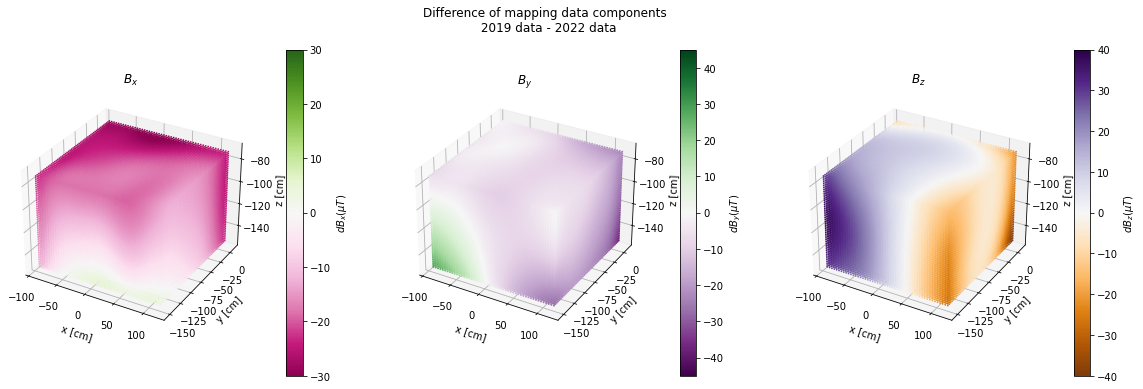

In [37]:
%matplotlib inline

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
fig.suptitle("Difference of mapping data components \n 2019 data - 2022 data")
#  ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
#                       'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])
axes = [ax1, ax2, ax3]

# my_cmap = plt.cm.seismic_r.copy(); 
# my_cmap.set_bad('aqua')); 
# ax.contourf(...., cmap=my_cmap, vmin=-50, vmax=50)

Q_19 = ax1.scatter(df_compare['x'], df_compare['y'], df_compare['z'],c=df_compare['dB_x'], s=.5, 
                   alpha=1, cmap=cm.PiYG, vmin=-30, vmax=30)
cbar_19 = fig.colorbar(Q_19, label='$dB_x (\mu T)$', ax=ax1, pad=0.1)
ax1.set_title("$B_x$")

Q_22 = ax2.scatter(df_compare['x'], df_compare['y'], df_compare['z'],c=df_compare['dB_y'], s=1, 
                   alpha=1, cmap=cm.PRGn, vmin=-45, vmax=45)
cbar_22 = fig.colorbar(Q_22, label='$dB_y (\mu T)$', ax=ax2, pad=0.1)
ax2.set_title("$B_y$")

Q_19 = ax3.scatter(df_compare['x'], df_compare['y'], df_compare['z'],c=df_compare['dB_z'], s=.5, 
                   alpha=1, cmap=cm.PuOr, vmin=-40, vmax=40)
cbar_19 = fig.colorbar(Q_19, label='$dB_z (\mu T)$', ax=ax3, pad=0.1)
ax3.set_title("$B_z$")

for a in axes:
    a.set_xlabel('x [cm]')
    a.set_ylabel('y [cm]')
    a.set_zlabel('z [cm]')

plt.show()



In [38]:
print("mean (x,y,z): ", np.mean(df_compare['dB_x']), np.mean(df_compare['dB_y']), np.mean(df_compare['dB_z']))
print("STD (x,y,z): ", np.std(df_compare['dB_x']), np.std(df_compare['dB_y']), np.std(df_compare['dB_z']))

mean (x,y,z):  -16.69596756502485 -7.3706433656758 6.230895163650643
STD (x,y,z):  6.839984826677595 7.023910550961514 10.671078832867195
